In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Headlines & Clean
headlinedata = pd.read_csv('../data/scraped/combined_headlines.csv')
headlinedata['titles'] = headlinedata.titles.apply(lambda x: x.strip('"\' ' ))
headlines = headlinedata.drop(columns=['Unnamed: 0'])

In [13]:
# Load Sentiment, Join, Drop Dupes, Write to disk
rsentiments = pd.read_csv('test2_rsentiments.csv', names = ["wordCount", "sentimentGI", "negativityGI", "positivityGI", 
                                                           "sentimentHE", "negativityHE", "positivityHE", "sentimentLM",
                                                           "negativityLM", "positivityLM", "ratioUncertaintyLM", "sentimentQDAP",
                                                           "negativityQDAP", "positivityQDAP", "direction"])

Rdata = pd.concat([headlines, rsentiments], axis=1)
Rdata = Rdata[~Rdata.titles.duplicated(keep='first')]
Rdata = Rdata[~Rdata.isnull().any(axis=1)]
Rdata.to_csv("../data/headline_sentiment.csv")

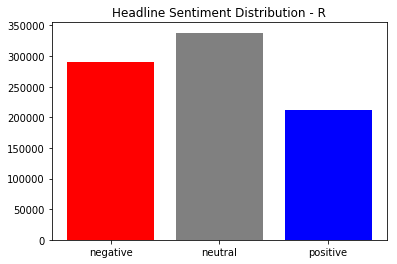

In [14]:
# Plot the Dist
Moods2 = Rdata.groupby('direction')
Moods_dist2 = Moods2['titles'].count()
x = np.arange(3)
plt.bar(x, Moods_dist2, color=['red','gray','blue'])
plt.xticks(x, Moods_dist2.index)
plt.title('Headline Sentiment Distribution - R')
plt.show()